In [1]:
import mdtraj as md
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq

https://figshare.com/articles/dataset/Microsecond_molecular_dynamics_simulation_of_kinase_domain_of_the_human_tyrosine_kinase_ABL1/4496795/1

This is a one microsecond trajectory of the catalytic domain of the human tyrosine protein kinase ABL1 (UNIPROT:ABL1_HUMAN, residues 242-493). The simulation was generated on Folding@home using OpenMM 6.3.1 with the AMBER99SB-ILDN forcefield, TIP3P water, and neutralizing salt. A Langevin integrator with 2 fs timestep, 300 K temperature, and 1/ps collision rate was used. PME with a nonbonded cutoff of 1.0 nm was used with default tolerance of 5.0e-4. A long-range isotropic dispersion correction was used to correct for the truncation of Lennard-Jones interactions at 1.0 nm. A molecular-scaling Monte Carlo barostat was applied using a 1 atm reference pressure, with MC moves attempted every 50 steps. Coordinates were saved every 250ps, and waters and ions stripped. The trajectory file contains 4000 snapshots. Initial models were generated with Ensembler (see References) using the ABL1 structure from chain B of PDB ID: 2GQG as a template.

https://www.rcsb.org/structure/2GQG

Trajetories and pdb can be downloaded here:
https://www.dropbox.com/s/qymy39ak2apqd75/ABL1.zip?dl=0


In [2]:
pdb='/Users/jackmcmahon/Development/CHEM 101.6/CHEM101.6/Exercise2/ABL1/ABL1.pdb'
trajectory='/Users/jackmcmahon/Development/CHEM 101.6/CHEM101.6/Exercise2/ABL1/ABL1.dcd'
outdir='/Users/jackmcmahon/Development/CHEM 101.6/CHEM101.6/Exercise2/ABL1/output'
if not os.path.exists('outdir'):
    os.makedirs('outdir')
    
print("outdir:",outdir)
print("pdb:",pdb)
print("trjaectory:",trajectory)

outdir: /Users/jackmcmahon/Development/CHEM 101.6/CHEM101.6/Exercise2/ABL1/output
pdb: /Users/jackmcmahon/Development/CHEM 101.6/CHEM101.6/Exercise2/ABL1/ABL1.pdb
trjaectory: /Users/jackmcmahon/Development/CHEM 101.6/CHEM101.6/Exercise2/ABL1/ABL1.dcd


In [3]:
trj = md.load(trajectory, top=pdb,stride=1)
trj.center_coordinates()
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames=trj.n_frames

In [4]:
nres=[]
for res in trj.topology.residues: nres.append(res.resSeq)
sequence=(' %s' % [residue for residue in trj.topology.residues])
resname=(' %s' % [residue.name for residue in trj.topology.residues])
resindex=(' %s' % [residue.index for residue in trj.topology.residues])
res_num=(' %s' % [residue.resSeq  for residue in trj.topology.residues])



#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue number: %s\n" % res_num)
print("residue index: %s\n" % resindex)


** SYSTEM INFO **

Number of atoms: 4062

Number of residues: 252

Number of frames: 4000

Starting frame: 0

Last frame: 4000

sequence:  [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER3

In [5]:
residue_num=[]
for res in top.residues: 
    residue_num.append(res.resSeq)
residue_id=np.asarray(residue_num)
residue_id

array([242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
       307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319,
       320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
       333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
       346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358,
       359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
       372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
       385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
       398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
       411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 42

In [6]:
#Use DSSP to calculate the secondary structure definition
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html
dssp=md.compute_dssp(trj,simplified=True)
dssp

array([['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'H', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ...,
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C']], dtype='<U2')

In [7]:
print(dssp.shape)
print("Rows:",len(dssp))
print("Columns:",len(dssp[0]))

#Print out helix and beta residues for a given frame
frame=0
dssp_frame=np.column_stack((residue_id,dssp[frame]))
helix_res=np.where(dssp_frame[:,1]=='H')
beta_res=np.where(dssp_frame[:,1]=='E')
print('helical residues:',dssp_frame[helix_res])
print('beta residues:',dssp_frame[beta_res])

(4000, 252)
Rows: 4000
Columns: 252
helical residues: [['280' 'H']
 ['281' 'H']
 ['282' 'H']
 ['283' 'H']
 ['284' 'H']
 ['285' 'H']
 ['286' 'H']
 ['287' 'H']
 ['288' 'H']
 ['289' 'H']
 ['323' 'H']
 ['324' 'H']
 ['325' 'H']
 ['326' 'H']
 ['327' 'H']
 ['337' 'H']
 ['338' 'H']
 ['339' 'H']
 ['340' 'H']
 ['341' 'H']
 ['342' 'H']
 ['343' 'H']
 ['344' 'H']
 ['345' 'H']
 ['346' 'H']
 ['347' 'H']
 ['348' 'H']
 ['349' 'H']
 ['350' 'H']
 ['351' 'H']
 ['352' 'H']
 ['353' 'H']
 ['354' 'H']
 ['355' 'H']
 ['356' 'H']
 ['357' 'H']
 ['366' 'H']
 ['367' 'H']
 ['368' 'H']
 ['373' 'H']
 ['374' 'H']
 ['375' 'H']
 ['403' 'H']
 ['404' 'H']
 ['405' 'H']
 ['408' 'H']
 ['409' 'H']
 ['410' 'H']
 ['411' 'H']
 ['412' 'H']
 ['413' 'H']
 ['420' 'H']
 ['421' 'H']
 ['422' 'H']
 ['423' 'H']
 ['424' 'H']
 ['425' 'H']
 ['426' 'H']
 ['427' 'H']
 ['428' 'H']
 ['429' 'H']
 ['430' 'H']
 ['431' 'H']
 ['432' 'H']
 ['433' 'H']
 ['449' 'H']
 ['450' 'H']
 ['451' 'H']
 ['452' 'H']
 ['453' 'H']
 ['466' 'H']
 ['467' 'H']
 ['468' 'H

(350.0, 400.0)

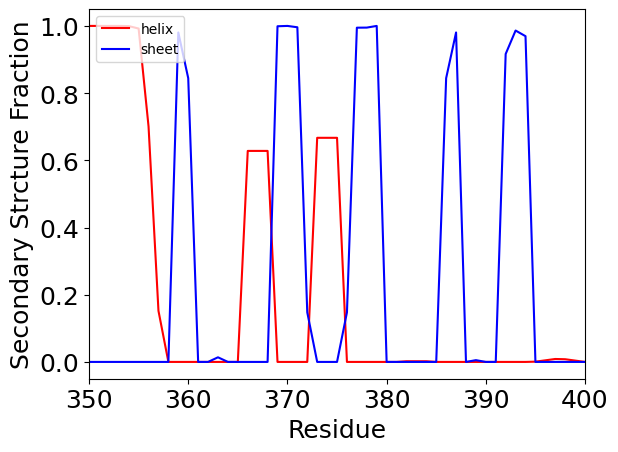

In [26]:
dssp=md.compute_dssp(trj,simplified=True)

def dssp_convert(dssp):
 dsspH=np.copy(dssp)
 dsspE=np.copy(dssp)
 dsspH[dsspH=='H']=1                                                                                      
 dsspH[dsspH=='E']=0                                                                                      
 dsspH[dsspH=='C']=0                                                                                      
 dsspH[dsspH=='NA']=0 
 dsspH=dsspH.astype(int)
 TotalH=np.sum(dsspH,axis=1) 
 Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspE) 

 dsspE[dsspE=='H']=0
 dsspE[dsspE=='E']=1
 dsspE[dsspE=='C']=0
 dsspE[dsspE=='NA']=0
 dsspE=dsspE.astype(int)
 TotalE=np.sum(dsspE,axis=1) 
 Eprop=np.sum(dsspE,axis=0).astype(float)/len(dsspE) 
 return Hprop, Eprop

Hprop,Eprop=dssp_convert(dssp)
plt.plot(residue_num,Hprop,c='r',label='helix')
plt.plot(residue_num,Eprop,c='b',label='sheet')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(350,400)


***HOMEWORK Problem 1***

**Use the full DSSP set of secondary structure assignments to plot the population of another secondary structure type and visualize it with a representative frame or frames in VMD**

**Consult the original DSSP paper (or online documentaiton) to confirm the criteria for this assignment** 

Kabsch W, Sander C (1983). “Dictionary of protein secondary structure: pattern recognition of hydrogen-bonded and geometrical features”. Biopolymers 22 (12): 2577-637. doi:10.1002/bip.360221211

dssp=md.compute_dssp(trj,simplified=False)

https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

The DSSP assignment codes are:

‘H’ : Alpha helix

‘B’ : Residue in isolated beta-bridge

‘E’ : Extended strand, participates in beta ladder

‘G’ : 3-helix (3/10 helix)

‘I’ : 5 helix (pi helix)

‘T’ : hydrogen bonded turn

‘S’ : bend

‘ ‘ : Loops and irregular elements

The simplified DSSP codes are:

‘H’ : Helix. Either of the ‘H’, ‘G’, or ‘I’ codes.

‘E’ : Strand. Either of the ‘E’, or ‘B’ codes.

‘C’ : Coil. Either of the ‘T’, ‘S’ or ‘ ‘ codes.

(350.0, 400.0)

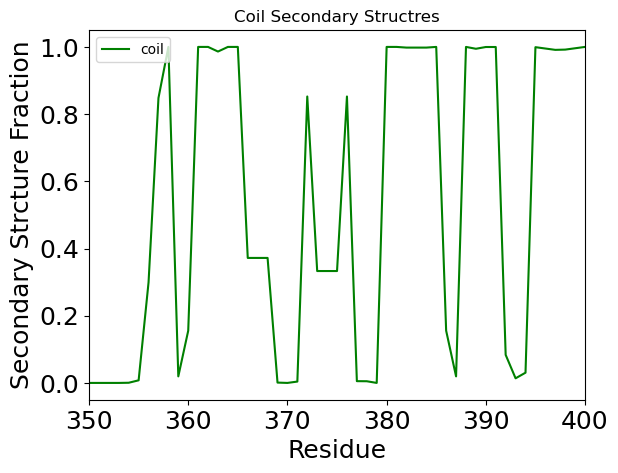

In [9]:
####HOMEWORK ######
#Use the full DSSP Definition and plot the population of another secondary structure type 
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

dssp_full=md.compute_dssp(trj,simplified=False)

def dssp_convert(dssp):
 dsspH=np.copy(dssp)
 dsspE=np.copy(dssp)
 dsspH[dsspH=='H']=0                                                                                     
 dsspH[dsspH=='E']=0                                                                                      
 dsspH[dsspH=='C']=1                                                                                      
 dsspH[dsspH=='NA']=0 
 dsspH=dsspH.astype(int)
 TotalH=np.sum(dsspH,axis=1) 
 Cprop=np.sum(dsspH,axis=0).astype(float)/len(dsspE) 

 return Cprop

Cprop=dssp_convert(dssp)
plt.plot(residue_num,Cprop,c='g',label='coil')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.title('Coil Secondary Structres')
plt.tick_params(labelsize=18)
plt.xlim(350,400)


***Challenge Problem #1***

**Write function/efficient loop to calculate all secondary structure populations from the dssp_full definitions 
and write out all residues numbers with > 90% of each seondary structure type**

H is above 90% in the following residues [281 282 283 324 325 326 327 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 410 411 422 423 424 425 426 427 428 429
 430 431 432 433 466 467 468 469 470 471 472 473 474 475 486 487 488 489]
B is above 90% in the following residues [298]
E is above 90% in the following residues [246 247 248 249 255 256 257 258 259 260 261 266 267 268 269 270 271 272
 301 302 303 304 313 314 315 369 370 371 377 378 379 392 393 394 415 416
 417]
G is above 90% in the following residues []
I is above 90% in the following residues []
T is above 90% in the following residues [262 263 264 265 275 276 277 296 297 319 320 332 333 334 358 418 419 434
 435]
S is above 90% in the following residues [307 308 309 310 390 391 414 436 439 440 478 479 483]
  is above 90% in the following residues [242 274 279 293 294 299 300 311 317 318 331 336 361 363 364 380 381 382
 385 388 402 407 437 438 444 457 459 460 461 465 477 484 485 493]


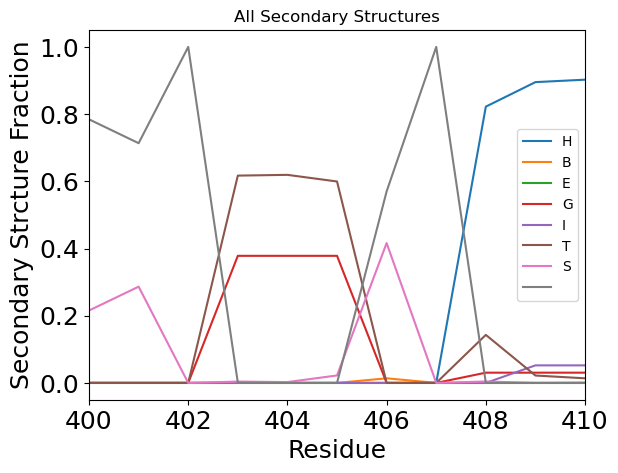

<Figure size 640x480 with 0 Axes>

In [70]:
#### Challenge Problem Write a Function to Compute the Population of Any Secondary Structure Type
#### Write a loop to plot all populations
#### Write code to output the residue numbers of every residue with > 90% each SS type

dssp_full=md.compute_dssp(trj,simplified=False)

def dssp_convert(dssp, name):
 dssp_i=np.copy(dssp)
 dssp_i[dssp_i!=name]=0     
 dssp_i[dssp_i==name]=1                 
 dssp_i=dssp_i.astype(int)
 Total_i=np.sum(dssp_i,axis=1) 
 prop=np.sum(dssp_i,axis=0).astype(float)/len(dssp_i) 
 return prop

full_definitions = ['H', 'B', 'E', 'G', 'I', 'T', 'S', ' ']
for full_def in full_definitions:
  prop = dssp_convert(dssp_full, full_def)
  plt.plot(residue_num,prop,label=full_def)
  above_90 = np.asarray(residue_num)[np.where(prop>0.9)]
  print(full_def, "is above 90% in the following residues", above_90)
  
plt.title("All Secondary Structures")
plt.legend()
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(400,410)
plt.show()
plt.clf()



***HOMEWORK Problem 2***

**Identify a residue that has a substantial population (>10%) of a second secondary structure assignment 
(for example something that is 50% helix/ 50% coil or 80% helix/ 20% coil) and make representative snapshots to illustrate the 2 conformations.  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation**

In [37]:
print(residue_num)

[242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441,

In [72]:
print("Screening for residues that meet criteria: 20% Both Coil and Helix forms")
      
for i in range(len(residue_num)):
  residue_number = residue_num[i]
  array_index=residue_number-242
  helix_frames=np.where(dssp[:,array_index]=='H')
  coil_frames=np.where(dssp[:,array_index]=='C')
  
  if len(helix_frames[0]) > 0.2*len(dssp[:,array_index]) and len(coil_frames[0]) > 0.2*len(dssp[:,array_index]): 
    print("Residue %s"%np.asarray(residue_num)[array_index])
    if residue_number==404:
      print("helix_frames:",helix_frames)
      print("coil_frames:",coil_frames)
    


Screening for residues that meet criteria: 20% Both Coil and Helix forms
Residue 284
Residue 285
Residue 286
Residue 291
Residue 328
Residue 329
Residue 356
Residue 366
Residue 367
Residue 368
Residue 373
Residue 374
Residue 375
Residue 403
Residue 404
helix_frames: (array([   0,    1,   49, ..., 3997, 3998, 3999]),)
coil_frames: (array([   2,    3,    4, ..., 3990, 3992, 3993]),)
Residue 405
Residue 413
Residue 420
Residue 421
Residue 445
Residue 446
Residue 447
Residue 448
Residue 452
Residue 480
Residue 481
Residue 482
Residue 490
Residue 491
Residue 492


Question 2: I'm choosing to analyze residue 404 because it shows an interesting nearly even split between coil form and helix form that isn't adjecent to any dominant segment of either.

In [24]:
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [28]:
np.shape(phis[:,0])

(4000,)

In [29]:
phi_dict={}
dihedral_dict = { 'phi': { },
          'psi': { },
          'chi1': { },
          'chi2': { }}

for i in range(0,len(indices_phi)):
  indices=indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]

In [30]:
sequence

' [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER349, ALA350, MET351, GLU352, TYR353, LEU354, GLU355, LYS356, LYS357, ASN358, PHE359, ILE360, HIS361, ARG362, ASP363, LEU364, ALA365, ALA36

In [31]:
#Heres a function to plot a phi/psi ramachandran plot:

def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

def plot_chi(res):
    if res in dihedral_dict['chi1']:
     plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('counts', size=18)
     plt.tick_params(labelsize=18)
     plt.show()
     plt.clf()   
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return




In [ ]:
#Asp
plot_phipsi(455)
plt.clf()
plot_chi(455)

In [90]:
#Lets Visualize Some Rotamers
#Lets Find all the VAL residues and plot thier X1 values
CA_sel=top.select('name CA')
resnames=[]
resnums=[]
for i in CA_sel:
 resnum=top.atom(i).residue.resSeq
 resnums.append(resnum)
 resname=top.atom(i).residue.name
 resnames.append(resname)

resnums=np.asarray(resnums)
resnames=np.asarray(resnames)
VAL_indices=np.where(resnames=='GLU')
Val_resnums=resnums[VAL_indices]
Val_resnums

array([255, 258, 275, 279, 281, 282, 286, 292, 308, 316, 329, 334, 352,
       355, 373, 409, 431, 450, 453, 459, 462, 466, 470, 488])

In [ ]:
for i in Val_resnums:
    print("Residue",i)
    plot_phipsi(i)
    plt.clf()
    plot_chi(i)
    plt.clf()

***HOMEWORK Problem 3***

**Identify a residue that has 2 rotameric states and make representative snapshots to illustrate the 2 conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the Chi 1 histogram (or Chi1/Chi2 if the residue has a Chi2 degree of freedom) and add a marking to the plot to indicate the dihedrals shown in your snapshot**



Question 3 Answer: I'm analyzing residue 341 Leucine because it has two main rotomeric conformations, one at -pi/2 and one at pi.

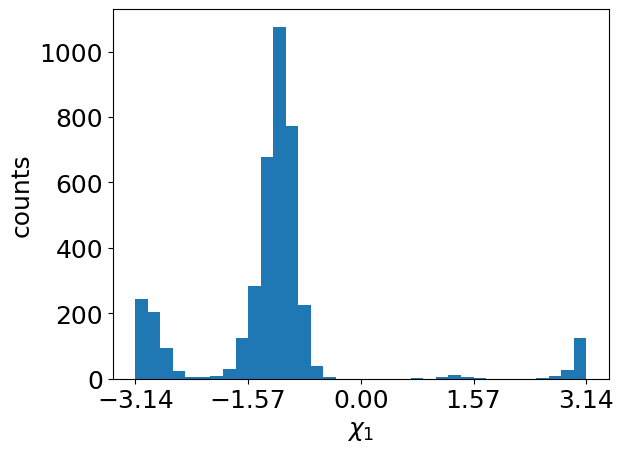

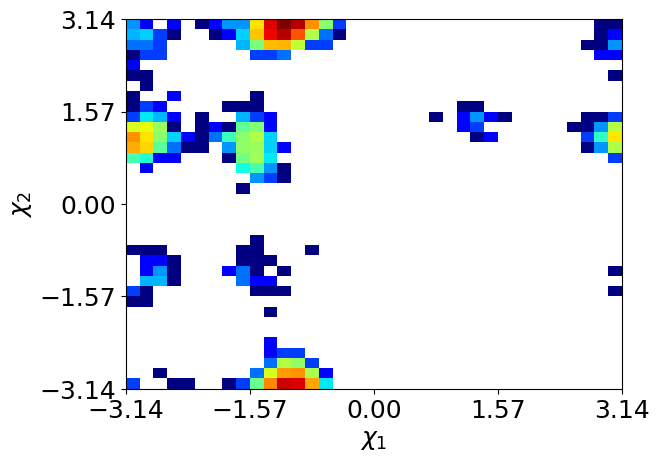

In [83]:
plot_chi(341)

***HOMEWORK Problem 4***

**Identify a residue that has 2 phi/psi free energy minima states and make representative snapshots to illustrate representative conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the phi/psi histograms and add marking to the plot to indicate the phi/psi angles shown in your snapshot**


Question 4 Answer: I'm analyzing residue 279 Glutamine because it has two main rotomeric conformations, one at -pi/2 and one at pi.

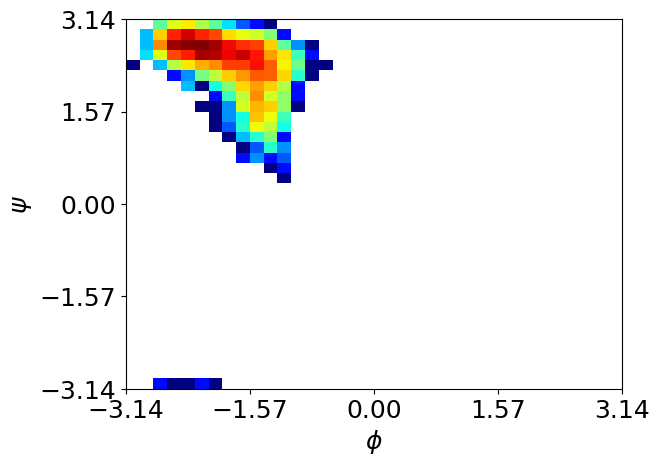

In [97]:
plot_phipsi(279)

***Challenge Problem 2***

**Identify a residue with phi/psi basins that favor distinct rotamers and make a plot of chi distributions for different regions of the phi/psi basins**


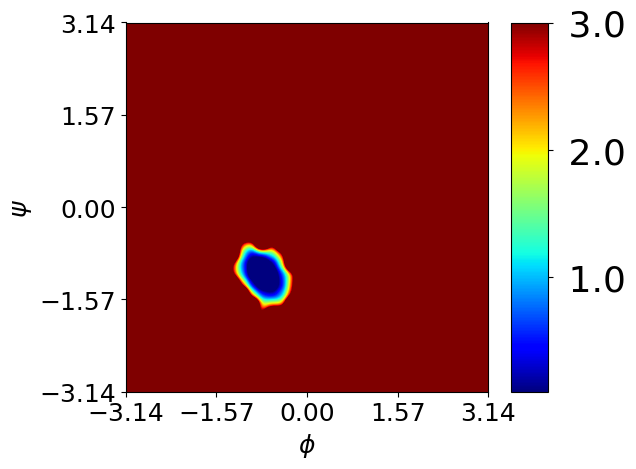

In [20]:
#Lets Make A Pretty Free Energy Plot 

def plot_phipsi_FES(res):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()                                                                                                 
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return

plot_phipsi_FES(350)